# 1. Load and imports

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import spacy
import nltk
import octis
from tqdm import tqdm_notebook
from tqdm import tqdm
import sys

from pre_process import *
from eda import *

import warnings 
tqdm.pandas()
tqdm_notebook().pandas()


warnings.filterwarnings("ignore")


/var/folders/n1/2dp16v113lv8x5rwt1t69_v40000gn/T/ipykernel_2297/4082280339.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm_notebook().pandas()


In [2]:
%load_ext autoreload

%autoreload 2

In [3]:
df_mairan = pd.read_csv('./../../Data/Dataframes/dataframe_mairan.csv')

# 2. Exploring

In [4]:
print('There are : ' + str(df_mairan.shape[0]) + ' eulogies')

There are : 10 eulogies


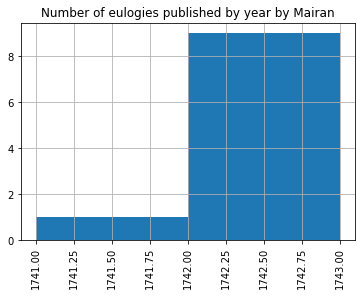

In [5]:
nbr_eulogies(df_mairan, 'Mairan', fig_size = (6,4))

## a. Number of characters

In [6]:
side_info(df_mairan)
df_mairan.head()

,Savant,Auteur,Annee,Eloge,Side_Info
0,Petit,Mairan,1741,François Pourfour Du Petit naquit à Paris le 2...,[]
1,De Polignac,Mairan,1742,"Melchior de Polignac, Cardinal Prêtre de l’Égl...",[]
2,Boulduc,Mairan,1742,"Gilles-François Boulduc, premier Apothicaire d...",[]
3,Halley,Mairan,1742,Edmond Halley fils d’Edmond Halley citoyen de ...,"[Ceci est dit, vaguement, et de la vue directe..."
4,De Bremond,Mairan,1743,Ce que le sang peut communiquer de disposition...,[]


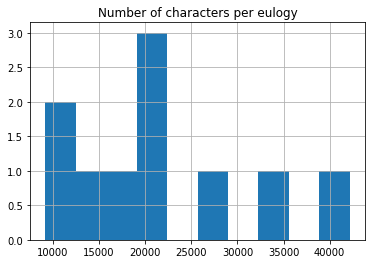

In [7]:
nbr_character(df_mairan)

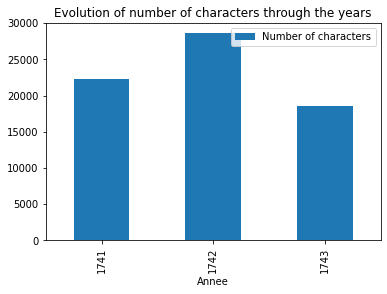

In [8]:
nbr_character(df_mairan, evol = True)

## b. Number of words

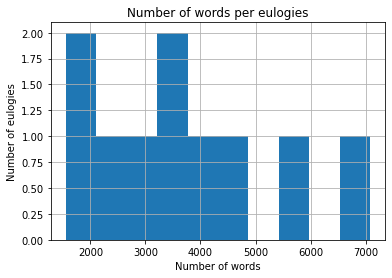

In [9]:
nbr_words(df_mairan)

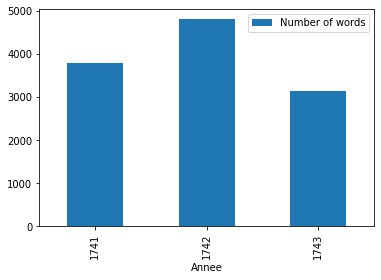

In [10]:
nbr_words(df_mairan, evol = True)

## c. Average word length

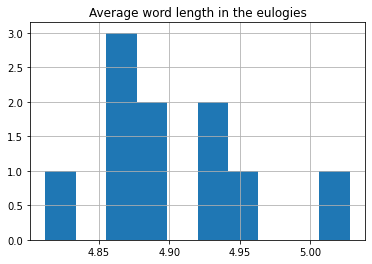

In [11]:
avg_word_length(df_mairan)

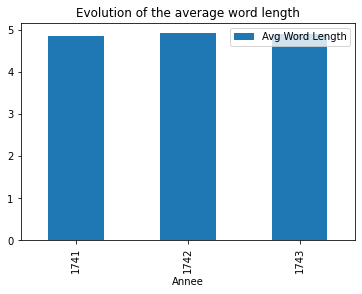

In [12]:
avg_word_length(df_mairan, evol = True)

## d. Average sentence length

In [13]:
from eda import *

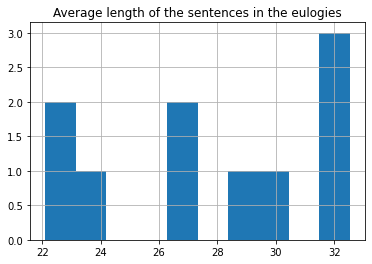

In [14]:
avg_sentence(df_mairan)

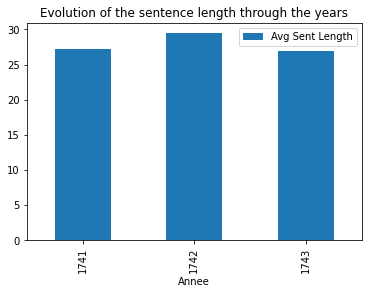

In [15]:
avg_sentence(df_mairan, evol = True)

# 3. Pre-processing

## a. Removing stop words

In [16]:
rmv_sw(df_mairan)

## b. Removing punctuation

In [17]:
rmv_punkt(df_mairan)

## c. Lemmatizing

In [19]:
lemmatize(df_mairan, 'Eloge', 'tags_lem')

## d. Removing digits

In [20]:
rmv_digit(df_mairan)

In [21]:
df_mairan.head()

,Savant,Auteur,Annee,Eloge,Side_Info,no_sw,no_sw_no_punkt,tags_lem,Eloge_lem
0,Petit,Mairan,1741,François Pourfour Du Petit naquit à Paris le 2...,[],François Pourfour Petit naquit Paris Juin 1664...,François Pourfour Petit naquit Paris Juin 1664...,"[(François, NAM, François), (Pourfour, NAM, Po...",François Pourfour du Petit naître à Paris le @...
1,De Polignac,Mairan,1742,"Melchior de Polignac, Cardinal Prêtre de l’Égl...",[],"Melchior Polignac, Cardinal Prêtre l’Église Ro...",Melchior Polignac Cardinal Prêtre l Église Ro...,"[(Melchior, NOM, melchior), (de, PRP, de), (Po...","melchior de polignac , cardinal prêtre de l’Ég..."
2,Boulduc,Mairan,1742,"Gilles-François Boulduc, premier Apothicaire d...",[],"Gilles-François Boulduc, Apothicaire Roi, anci...",Gilles François Boulduc Apothicaire Roi anci...,"[(Gilles-François, NAM, Gilles-François), (Bou...","Gilles-François Boulduc , premier apothicaire ..."
3,Halley,Mairan,1742,Edmond Halley fils d’Edmond Halley citoyen de ...,"[Ceci est dit, vaguement, et de la vue directe...",Edmond Halley fils d’Edmond Halley citoyen Lon...,Edmond Halley fils d Edmond Halley citoyen Lon...,"[(Edmond, NAM, Edmond), (Halley, NAM, Halley),...",Edmond Halley fils|fil d’Edmond Halley citoyen...
4,De Bremond,Mairan,1743,Ce que le sang peut communiquer de disposition...,[],sang communiquer dispositions talents fort dou...,sang communiquer dispositions talents fort dou...,"[(Ce, PRO:DEM, ce), (que, PRO:REL, que), (le, ...",ce que le sang pouvoir communiquer de disposit...


# 3. Part-of-Speech

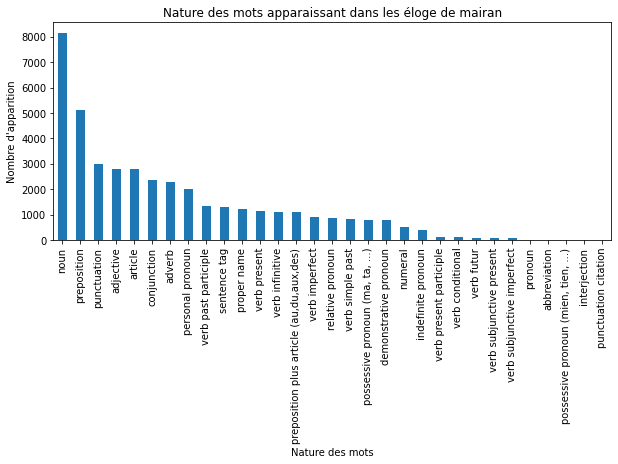

In [22]:
part_of_speech_hist(df_mairan, 'mairan')


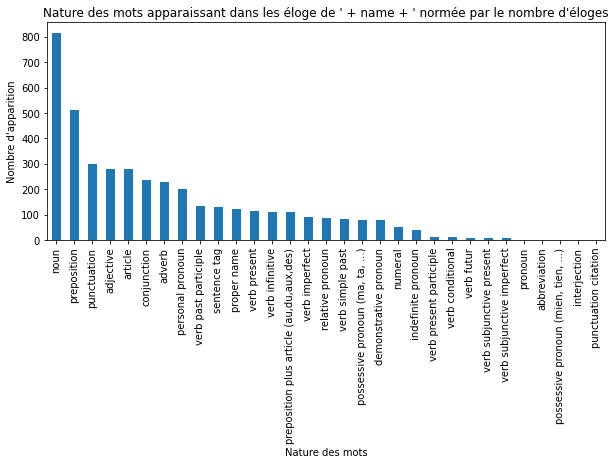

In [23]:
part_of_speech_hist(df_mairan, 'mairan',nbr = df_mairan.shape[0])


# 4. Royal Academy

Percentage of first-person pronouns : 11.072056239015817%


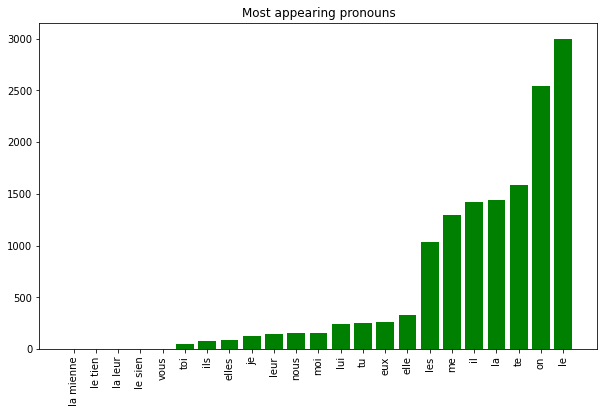

In [24]:
self_disclosure(df_mairan)

In [25]:
df_mairan

,Savant,Auteur,Annee,Eloge,Side_Info,no_sw,no_sw_no_punkt,tags_lem,Eloge_lem,pos
0,Petit,Mairan,1741,François Pourfour Du Petit naquit à Paris le 2...,[],François Pourfour Petit naquit Paris Juin 1664...,François Pourfour Petit naquit Paris Juin 1664...,"[(François, NAM, François), (Pourfour, NAM, Po...",François Pourfour du Petit naître à Paris le @...,"[proper name, proper name, preposition plus ar..."
1,De Polignac,Mairan,1742,"Melchior de Polignac, Cardinal Prêtre de l’Égl...",[],"Melchior Polignac, Cardinal Prêtre l’Église Ro...",Melchior Polignac Cardinal Prêtre l Église Ro...,"[(Melchior, NOM, melchior), (de, PRP, de), (Po...","melchior de polignac , cardinal prêtre de l’Ég...","[noun, preposition, noun, punctuation, adjecti..."
2,Boulduc,Mairan,1742,"Gilles-François Boulduc, premier Apothicaire d...",[],"Gilles-François Boulduc, Apothicaire Roi, anci...",Gilles François Boulduc Apothicaire Roi anci...,"[(Gilles-François, NAM, Gilles-François), (Bou...","Gilles-François Boulduc , premier apothicaire ...","[proper name, proper name, punctuation, numera..."
3,Halley,Mairan,1742,Edmond Halley fils d’Edmond Halley citoyen de ...,"[Ceci est dit, vaguement, et de la vue directe...",Edmond Halley fils d’Edmond Halley citoyen Lon...,Edmond Halley fils d Edmond Halley citoyen Lon...,"[(Edmond, NAM, Edmond), (Halley, NAM, Halley),...",Edmond Halley fils|fil d’Edmond Halley citoyen...,"[proper name, proper name, noun, adjective, pr..."
4,De Bremond,Mairan,1743,Ce que le sang peut communiquer de disposition...,[],sang communiquer dispositions talents fort dou...,sang communiquer dispositions talents fort dou...,"[(Ce, PRO:DEM, ce), (que, PRO:REL, que), (le, ...",ce que le sang pouvoir communiquer de disposit...,"[demonstrative pronoun, relative pronoun, arti..."
5,De Molières,Mairan,1743,"Joseph Privat de Molières, Prêtre, Lecteur et ...","[M. Daniel Bernoulli, M. Caffini]","Joseph Privat Molières, Prêtre, Lecteur Profes...",Joseph Privat Molières Prêtre Lecteur Profes...,"[(Joseph, NAM, Joseph), (Privat, NAM, Privat),...","Joseph Privat de molière , prêtre , lecteur et...","[proper name, proper name, preposition, noun, ..."
6,Hunauld,Mairan,1743,François Joseph Hunauld naquit à Châteaubriant...,[],François Joseph Hunauld naquit Châteaubriant F...,François Joseph Hunauld naquit Châteaubriant F...,"[(François, NAM, François), (Joseph, NAM, Jose...",François Joseph Hunauld naître à châteaubriant...,"[proper name, proper name, proper name, verb s..."
7,De Fleury,Mairan,1743,André Hercule De Fleury ancien Evêque de Fréju...,[*Tout ceci est tiré d’une lettre ou relation ...,"André Hercule Fleury ancien Evêque Fréjus, Pré...",André Hercule Fleury ancien Evêque Fréjus Pré...,"[(André, NAM, André), (Hercule, NAM, Hercule),...",André Hercule de Fleury ancien Evêque de Fréju...,"[proper name, proper name, preposition, proper..."
8,Bignon,Mairan,1743,"Jean-Paul Bignon, Abbé de Saint Quentin en l’I...","[En 1684, en 1718, 1743]","Jean-Paul Bignon, Abbé Saint Quentin l’Isle, c...",Jean Paul Bignon Abbé Saint Quentin l Isle c...,"[(Jean-Paul, ADJ, Jean-Paul), (Bignon, NOM, bi...","Jean-Paul bignon , abbé de saint Quentin en l’...","[adjective, noun, punctuation, noun, prepositi..."
9,Lémery,Mairan,1743,"Nicolas Lémery, l’un des anciens Membres de ce...",[],"Nicolas Lémery, l’un anciens Membres Compagnie...",Nicolas Lémery l un anciens Membres Compagnie...,"[(Nicolas, NAM, Nicolas), (Lémery, NAM, Lémery...","Nicolas Lémery , l’un du ancien membre de ce c...","[proper name, proper name, punctuation, noun, ..."


In [26]:
add_tags(df_mairan,'Eloge', 'tags')
project_back(df_mairan)


Number of verbs in past tense : 3108
Number of verbs not in past tense : 2613
Percentage of verbs in past tense : 54.326166754063976%


# 5. Topic Modeling

In [28]:
rmv_sw(df_mairan, 'Eloge_lem')
rmv_punkt(df_mairan, 'Eloge_lem')


In [30]:
nouns_verbs(df_mairan, 'Eloge_lem')

In [31]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('distiluse-base-multilingual-cased-v1')
embeddings = model.encode(df_mairan.n_v, show_progress_bar=True)

In [32]:
from bertopic import BERTopic


# Create topic model
model = BERTopic(language ='French')
topics, probabilities = model.fit_transform(df_mairan.n_v, embeddings)

In [67]:
import umap
umap_embeddings = umap.UMAP(n_neighbors=2, 
                            n_components=10, 
                            metric='cosine').fit_transform(embeddings)

In [68]:
import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=2,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_embeddings)

In [69]:
import matplotlib.pyplot as plt

# Prepare data
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_


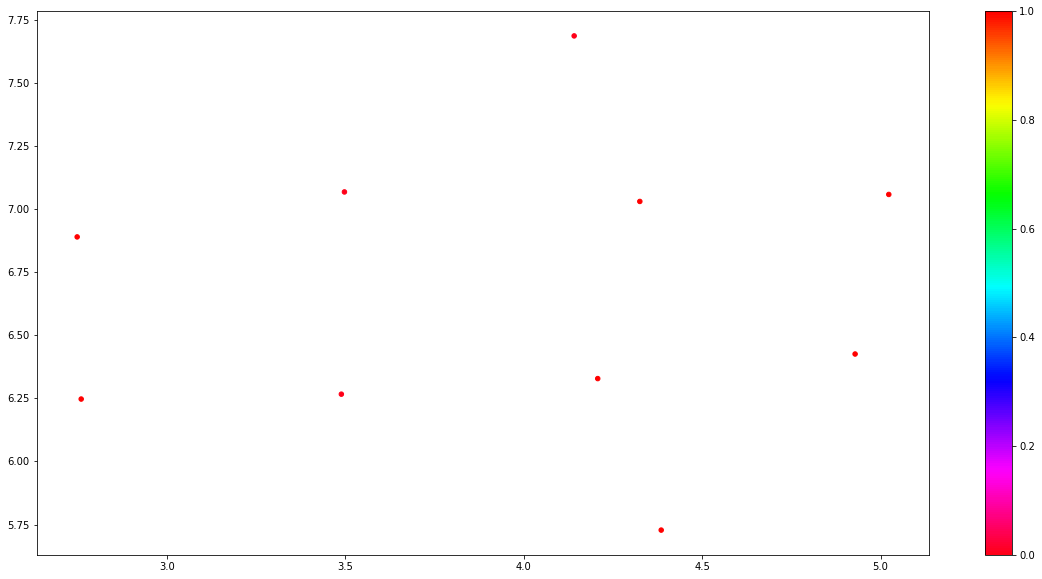

In [70]:
# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=20)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=20, cmap='hsv_r')
plt.colorbar()

In [77]:
result.to_csv('./../../Data/Results/Topic_Modeling_Mairan.csv')

In [71]:
docs_df = pd.DataFrame({'Doc' : df_mairan.n_v.tolist(), 'Annee' :df_mairan.Annee.tolist()})
docs_df['Topic'] = cluster.labels_
docs_df['Doc_ID'] = range(len(docs_df))
docs_df.head()
docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})

In [72]:
from topic_modeling import *

In [73]:
tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(df_mairan.n_v))

In [74]:
top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
topic_sizes = extract_topic_sizes(docs_df); topic_sizes.head(10)


,Topic,Size
1,1,7
0,0,3


In [75]:
top_n_words[1][:]

[('vapeur', 0.00035086759788403415),
 ('remarque', 0.00035086759788403415),
 ('monstre', 0.00035086759788403415),
 ('essai', 0.00035086759788403415),
 ('réserver', 0.00035086759788403415),
 ('adresser', 0.00035086759788403415),
 ('édition', 0.00035086759788403415),
 ('compte', 0.00035086759788403415),
 ('remettre', 0.00035086759788403415),
 ('note', 0.00035086759788403415),
 ('capitaine', 0.00035086759788403415),
 ('analyser', 0.00035086759788403415),
 ('vaquer', 0.00035086759788403415),
 ('pape', 0.00035086759788403415),
 ('obliger', 0.00035086759788403415),
 ('style', 0.00035086759788403415),
 ('moment', 0.00035086759788403415),
 ('latitude', 0.00035086759788403415),
 ('préparation', 0.00035086759788403415),
 ('passage', 0.00035086759788403415)]

In [76]:
top_n_words[0][:]

[('botanique', 0.0008693460454213995),
 ('précepteur', 0.0008693460454213995),
 ('fluide', 0.0008693460454213995),
 ('nerf', 0.0008567168911237686),
 ('fidélité', 0.0008567168911237686),
 ('ascension', 0.0008567168911237686),
 ('globule', 0.0008567168911237686),
 ('cristallin', 0.0008567168911237686),
 ('traverser', 0.0008567168911237686),
 ('machine', 0.0008567168911237686),
 ('protéger', 0.0008567168911237686),
 ('eut', 0.0008567168911237686),
 ('député', 0.0008567168911237686),
 ('confondre', 0.0008567168911237686),
 ('pratiquer', 0.0008567168911237686),
 ('ministère', 0.0008220436202086637),
 ('cataracte', 0.0008220436202086637),
 ('commissaire', 0.0007634904707941653),
 ('pompe', 0.0007634904707941653),
 ('badinage', 0.0007634904707941653)]

<AxesSubplot:xlabel='Annee', ylabel='count'>

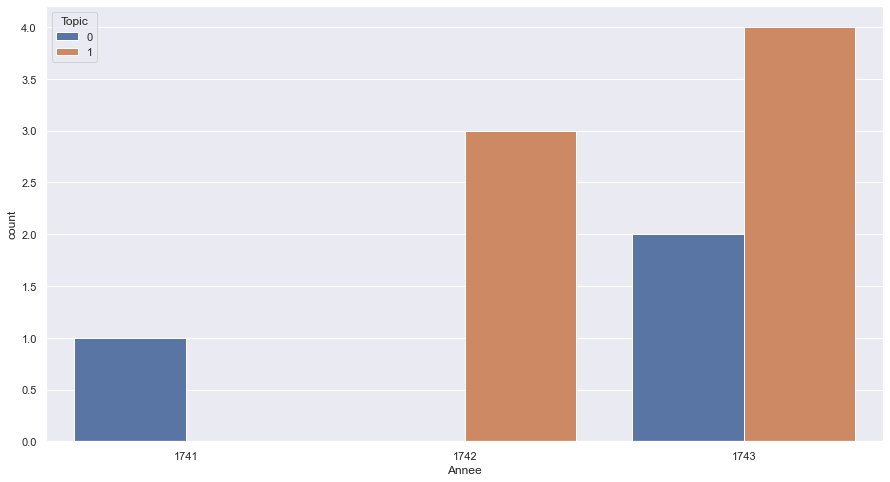

In [78]:
import seaborn as sns

sns.set(rc={'figure.figsize':(15,8)})

sns.countplot(x='Annee', hue='Topic', data = docs_df)